In [27]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

In [28]:
for dirname, _, filenames in os.walk('Downloads'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Downloads\'Certificate of Attendance (RH104-9.1).pdf'
Downloads\191211103279_marksheet.pdf
Downloads\191211103279_marksheet[1].pdf
Downloads\22a39f1ad8471118e5680bd2433ca452.jpg
Downloads\4k-marvel-avengers-endgame-poster-vqifoia5of7yg3ut.jpg
Downloads\Agneepath (2012) Hindi 1080p BluRay x264.mkv
Downloads\AI-Driven-Packaging-Design-Optimization-for-Sustainability-and-Appeal.pdf
Downloads\AI-Driven-Packaging-Design-Optimization-for-Sustainability-and-Appeal.pptx
Downloads\anime.jpg
Downloads\archive.zip
Downloads\arzu-sendag-ifgqd3CiK1U-unsplash.jpg
Downloads\aud (1).mp3
Downloads\aud (2) - Copy.mp3
Downloads\aud (2).mp3
Downloads\aud.mp3
Downloads\Automated-Packaging-Design-Optimization-for-Sustainability-and-Appeal (1).pptx
Downloads\Automated-Packaging-Design-Optimization-for-Sustainability-and-Appeal (2).pptx
Downloads\Automated-Packaging-Design-Optimization-for-Sustainability-and-Appeal (3).pptx
Downloads\Automated-Packaging-Design-Optimization-for-Sustainability-and-Appeal.pdf
Do

In [33]:
import math  # Import math to use the ceil function for rounding up

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nCol = df.shape[1]  # Number of columns in the DataFrame
    nGraphRow = math.ceil(min(nCol, nGraphShown) / nGraphPerRow)  # Ensure rows are always an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)  # Create subplot
        columnDf = df.iloc[:, i]  # Select the i-th column
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            columnDf.value_counts().plot.bar()
        else:
            columnDf.hist()
        
        plt.ylabel('Counts')
        plt.title(f'{df.columns[i]} (column {i})')

    plt.tight_layout()
    plt.show()


In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plotCorrelationMatrix(df, graphWidth):
    # Optional: Assign a default name if 'dataframeName' is not set
    filename = getattr(df, 'dataframeName', 'DataFrame')
    
    # Ensure the DataFrame has numeric data
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        print(f"No numeric data to plot in {filename}")
        return
    
    # Drop columns with NaN values
    numeric_df = numeric_df.dropna(axis=1)  
    
    # Keep columns with more than 1 unique value
    numeric_df = numeric_df[[col for col in numeric_df if numeric_df[col].nunique() > 1]]
    
    # Check if there are enough columns for correlation
    if numeric_df.shape[1] < 2:
        print(f"Not enough columns for correlation matrix after preprocessing in {filename}")
        return
    
    # Calculate the correlation matrix
    corr = numeric_df.corr()
    
    # Plot the matrix
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    plt.matshow(corr, fignum=1)
    plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, rotation=90)
    plt.yticks(range(numeric_df.shape[1]), numeric_df.columns)
    plt.colorbar()
    plt.title(f'Correlation Matrix ({filename})', fontsize=15)
    plt.show()

  


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

def plotScatterMatrix(df, plotSize, textSize):
    # Select only numerical columns
    df = df.select_dtypes(include=[np.number])  
    
    # Drop columns with NaN values
    df = df.dropna(axis=1)  
    
    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # Check if there are enough columns to plot
    if df.shape[1] < 2:
        print("Not enough numerical columns to create a scatter matrix.")
        return
    
    # Scatter matrix plot
    axs = scatter_matrix(df, figsize=(plotSize, plotSize), diagonal='kde')
    
    # Adjust text size for readability
    for ax in axs.ravel():
        ax.xaxis.label.set_size(textSize)
        ax.yaxis.label.set_size(textSize)
        ax.tick_params(axis='both', labelsize=textSize)

    plt.show()


In [54]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# station_month.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:/Users/harsh/Downloads/station_month.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'station_month.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 840 rows and 7 columns


In [55]:
df1.head(5)

,Station,Year,Month,Day,Night,DayLimit,NightLimit
0,DEL01,2018,1,53,52,50,40
1,DEL01,2018,2,53,53,50,40
2,DEL01,2018,3,53,53,50,40
3,DEL01,2018,4,55,58,50,40
4,DEL01,2018,5,55,57,50,40


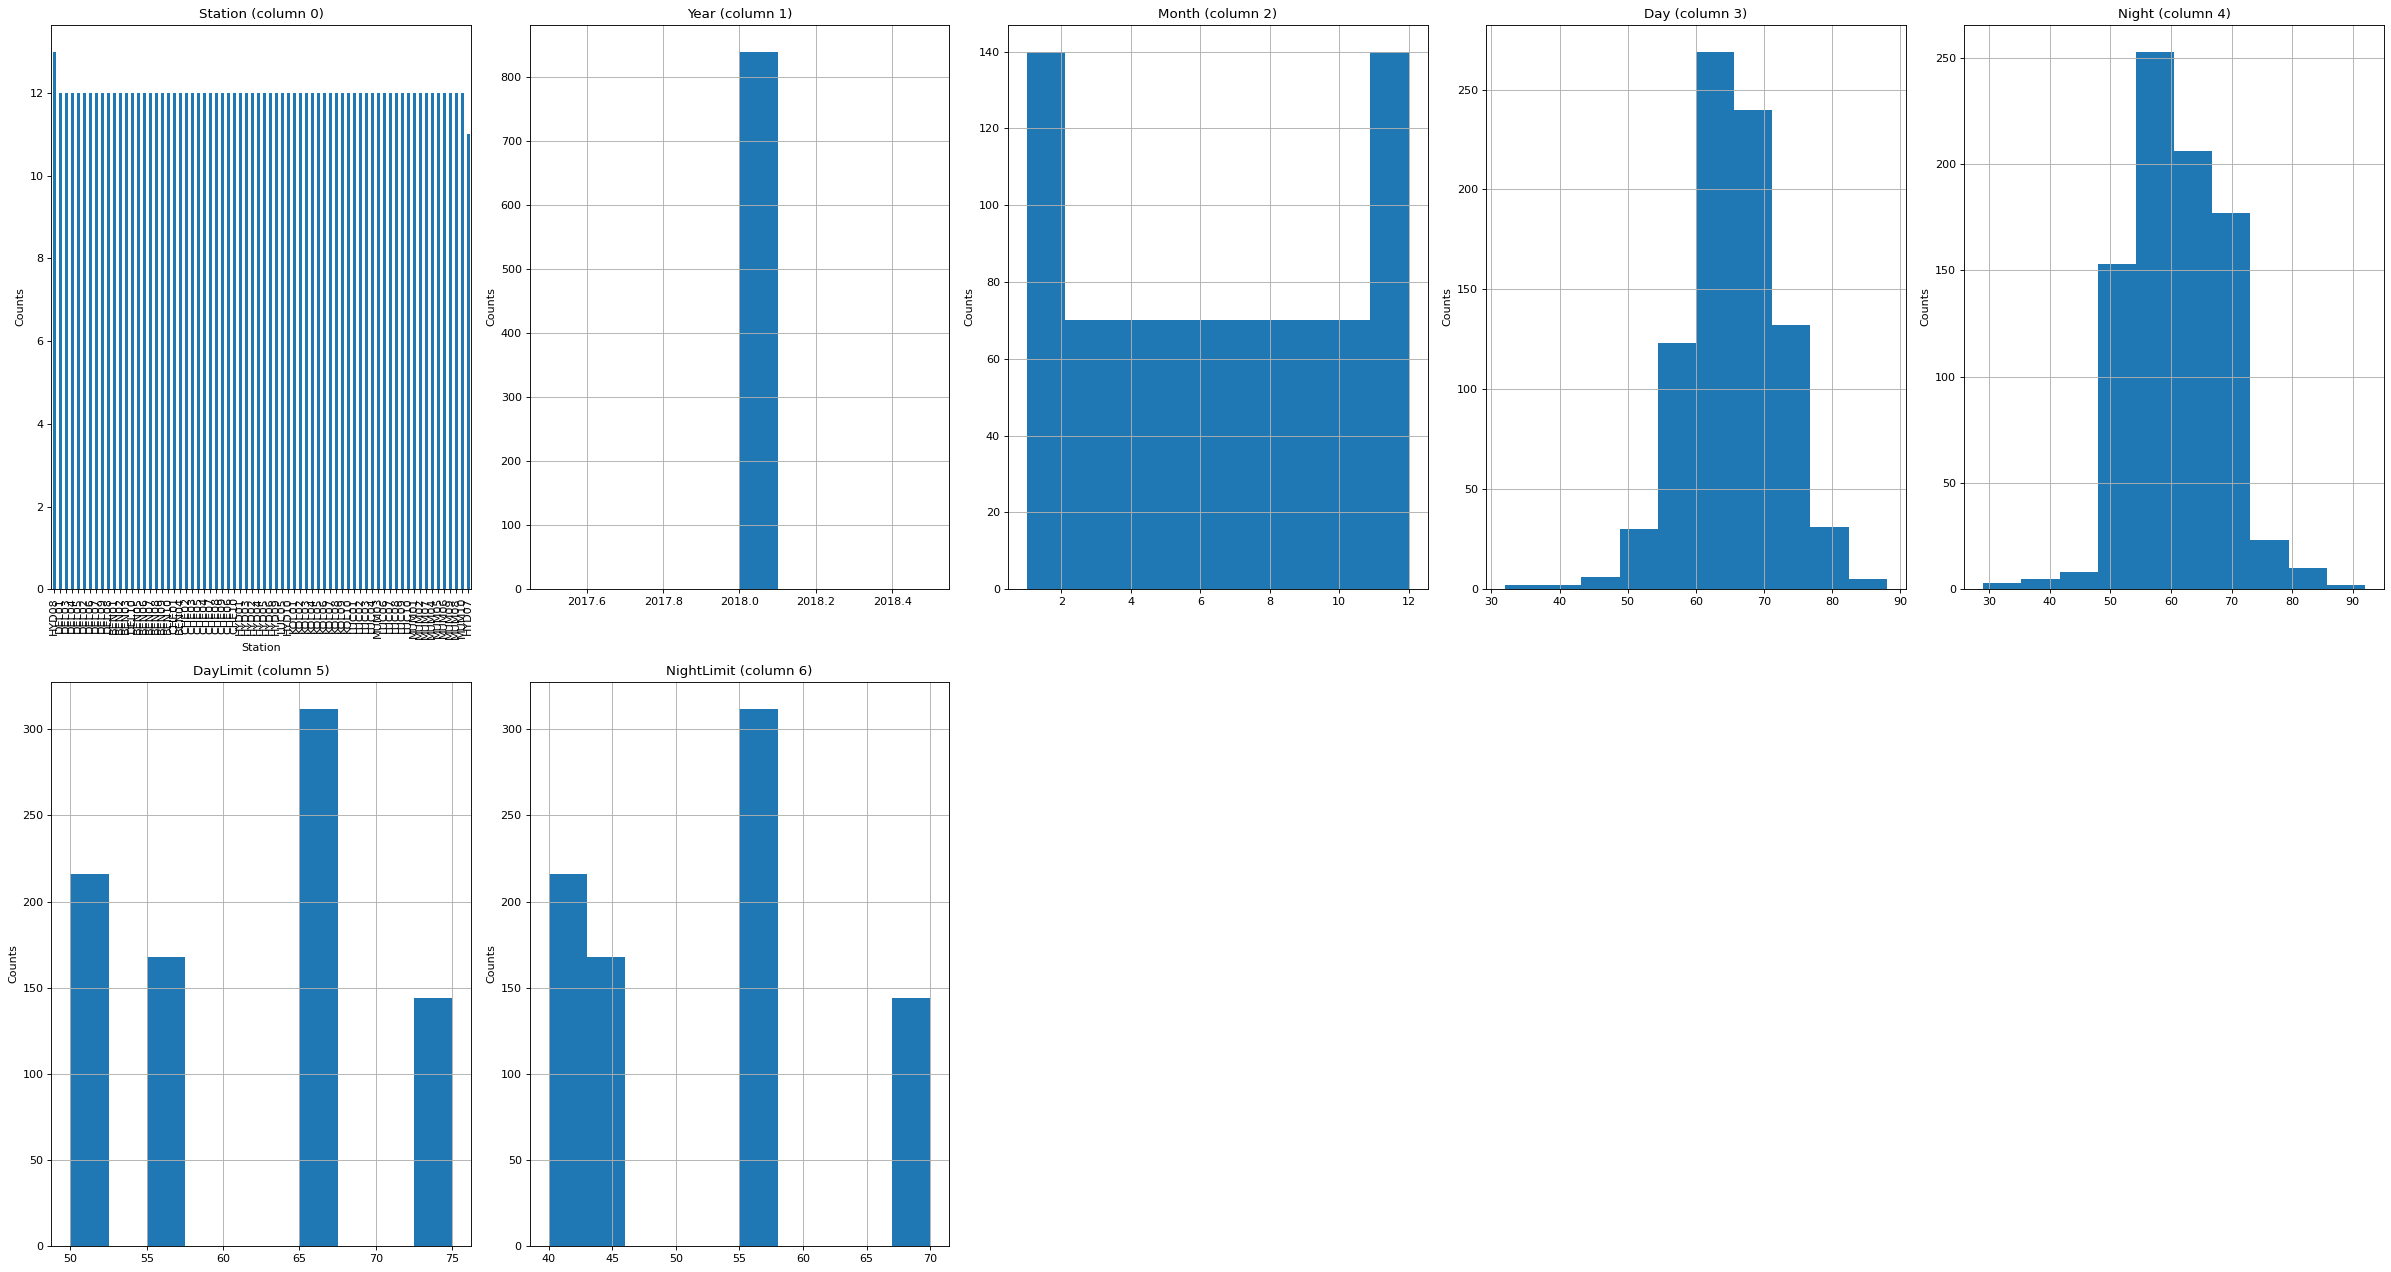

In [56]:
plotPerColumnDistribution(df1, 10, 5)

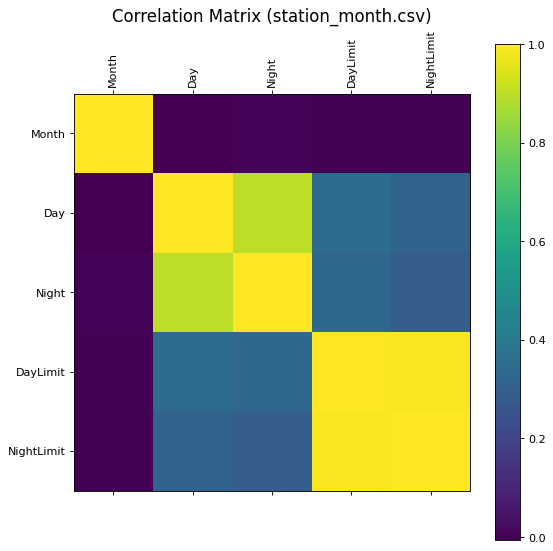

In [57]:
plotCorrelationMatrix(df1, 8)

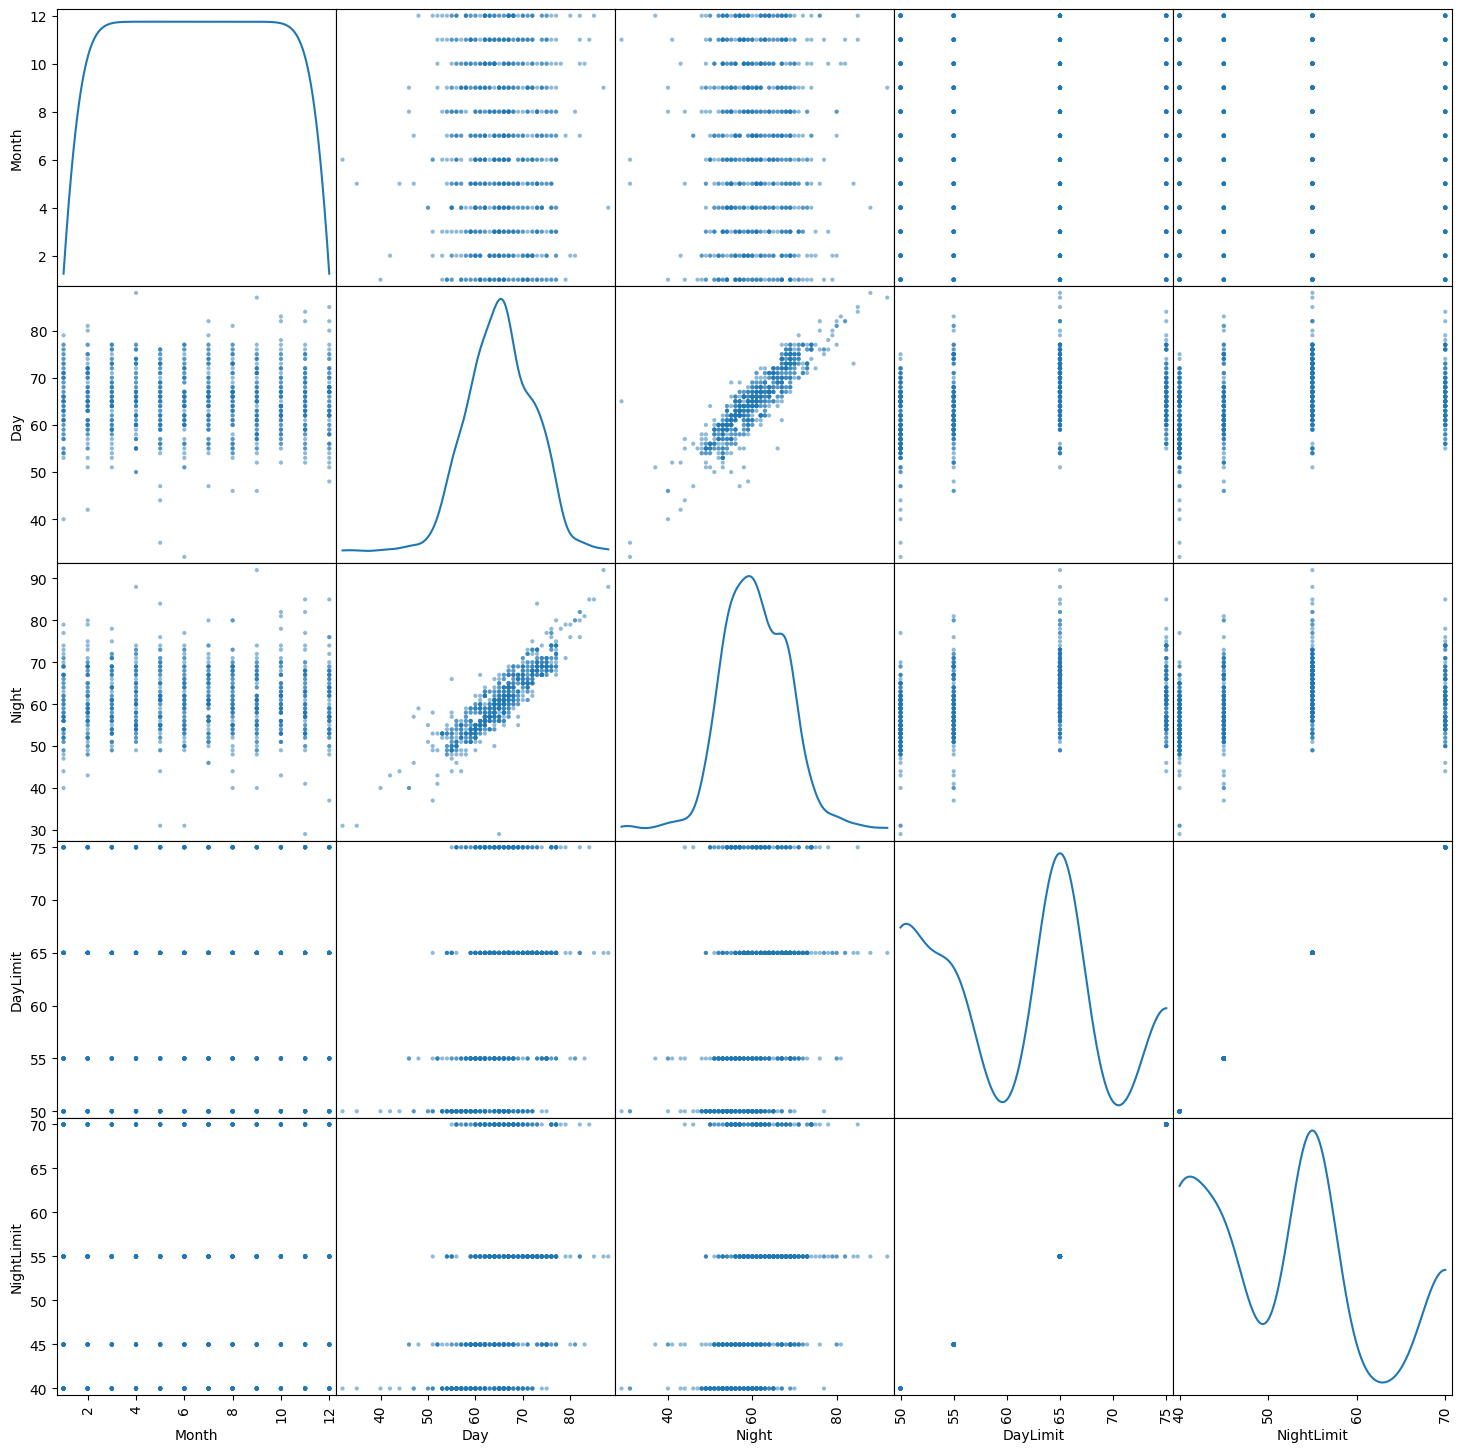

In [59]:
plotScatterMatrix(df1, 18, 10)

In [60]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# stations.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('C:/Users/harsh/Downloads/stations.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'stations.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 70 rows and 5 columns


In [61]:
df2.head(5)

,Station,Name,City,State,Type
0,DEL01,Dilshad Garden,Delhi,Delhi,Silence
1,DEL02,"CPCB, HQ",Delhi,Delhi,Commercial
2,DEL03,"DCE, Bawana",Delhi,Delhi,Silence
3,DEL04,ITO,Delhi,Delhi,Commercial
4,DEL05,"NSIT, Dwarka",Delhi,Delhi,Silence


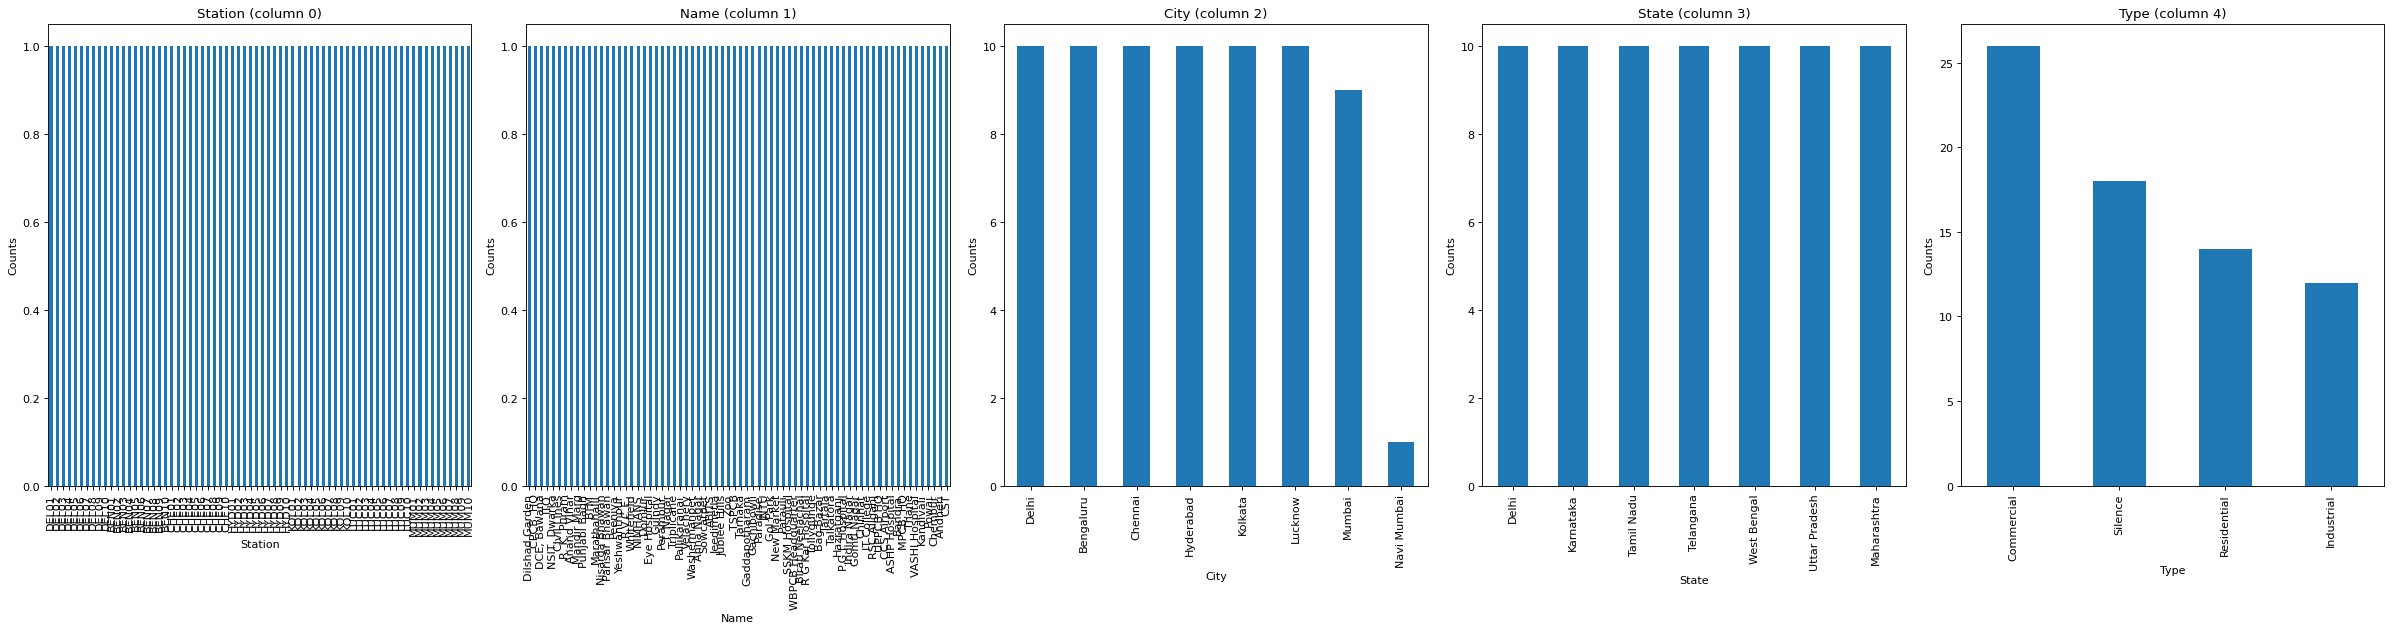

In [63]:
plotPerColumnDistribution(df2, 10, 5)